In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def data_load(filename):  #data loading 
    data_raw=np.loadtxt(filename,dtype="int")
    l=len(data_raw)
    s=[]
    for i in range(l):
        s.append(data_raw[i][0])
        s.append(data_raw[i][1])
    s=list(set(s))
    dic={}
    for i in range(len(s)):
        dic[s[i]]=i
    for i in range(l):
        data_raw[i][0]=dic[data_raw[i][0]]
        data_raw[i][1]=dic[data_raw[i][1]]
    return data_raw


def graph_adj(data,node_num):  #adj matrix generator
    adj=np.zeros((node_num,node_num))
    for i in range(node_num):
        adj[data[i][0]][data[i][1]]=1
        adj[data[i][1]][data[i][0]]=1
    return adj

def graph_plot(data): # graph ploting
    G=nx.Graph()
    for i in range(len(data)):
        G.add_edge(data[i][0],data[i][1])
    nx.draw(G,node_size=3)
    plt.show()

def graph_deg(adj):  #generate degree matrix
    deg=[]
    for i in range(len(adj)):
        deg.append(np.sum(adj[i]))
    return deg

def deg_dist(data_deg):# generate distribution of degree
    deg_set=list(set(data_deg))
    dist={}
    for i in range(len(deg_set)):
        s=0
        for j in range(len(data_deg)):
            if data_deg[j]==deg_set[i]:
                s=s+1
        s=s/len(data_deg)
        dist[deg_set[i]]=s
    return dist

def ecdf(dist,x): #ecdf function for a certain distribution
    xs=[]
    for key in dist.keys():
        xs.append(key)
    xs=sorted(xs)
    p=0
    for i in range(len(xs)):
        if x>=xs[i]:
            p=p+dist[xs[i]]
    return(p)

def KS_statistic(dist1,dist2,x_list): # calculate ks statistic
    ks=0
    for x in x_list:
        if abs(ecdf(dist1,x)-ecdf(dist2,x))>ks:
            ks=abs(ecdf(dist1,x)-ecdf(dist2,x))
    return ks

def data_map(node,edge):
    import copy
    node0=sorted(list(set(node)))
    node_new=list(range(len(node0)))
    edge_new=copy.deepcopy(edge)
    for i in range(len(edge)):
        edge_new[i][0]=node0.index(edge[i][0])
        edge_new[i][1]=node0.index(edge[i][1])
    return node_new,edge_new

def get_friend(adj,node):#obtain the friend node for a node
    friend=[]
    for i in range(len(adj)):
        if adj[node][i]==1:
            friend.append(i)
    return friend

def graph_plot(data): # graph ploting
    G=nx.Graph()
    for i in range(len(data)):
        G.add_edge(data[i][0],data[i][1])
    return G


data_facebook=data_load("facebook_combined.txt")
adj_facebook=graph_adj(data_facebook,4039)
deg_facebook=graph_deg(adj_facebook)
dist_facebook=deg_dist(deg_facebook)

In [20]:
import random

#rw
def rw(adj_raw,k):
	l=len(adj_raw)
	r0=random.sample(range(l),1)[0]
	edge=[]
	node=[]
	node.append(r0)
	i=0
	while i<k:
		node0=adj_raw[r0]
		index=list(np.array(range(1,l+1))*node0)
		while 0 in index:
			index.remove(0)
		if len(index)>0:
			r1=int(random.sample(index,1)[0])-1
			edge.append([r0,r1])
			node.append(r1)
			r0=r1
			i=i+1
		else:
			r0=random.sample(range(l),1)[0]
			node.append(r0)
	return node,edge


In [21]:
# mhrw
def mhrw(adj_raw,deg_raw,k):
    l=len(adj_raw)
    r0=random.sample(range(l),1)[0]
    edge=[]
    node=[]
    node.append(r0)
    i=0
    while i<k:
        node0=adj_raw[r0]
        index=list(np.array(range(1,l+1))*node0)
        while 0 in index:
            index.remove(0)
        if len(index)>0:
            r1=int(random.sample(index,1)[0])-1
        else:
            r0=random.sample(range(l),1)[0]
            node.append(r0)
            continue
        p=random.uniform(0,1)
        if deg_raw[r0]/deg_raw[r1]>=p:
            edge.append([r0,r1])
            node.append(r1)
            r0=r1
            i=i+1  
    return node,edge      

In [11]:
#node sample
node=random.sample(range(4039),808)
node=sorted(node)
adj_node=[]
for i in node:
	adj=list(adj_facebook[i][node])
	adj_node.append(adj)
deg_node=graph_deg(adj_node)
dist_node=deg_dist(deg_node)

x_list=[]
for key in dist_node.keys():
	x_list.append(key)
ks_node=KS_statistic(dist_facebook,dist_node,x_list)
print(ks_node)

0.3265782384130961


In [22]:
#rwrw
def rwrw(adj_raw,k):
	l=len(adj_raw)
	r0=random.sample(range(l),1)[0]
	edge=[]
	node=[]
	node.append(r0)
	i=0
	while i<k:
		node0=adj_raw[r0]
		index=list(np.array(range(1,l+1))*node0)
		while 0 in index:
			index.remove(0)
		if len(index)>0:
			r1=int(random.sample(index,1)[0])-1
			edge.append([r0,r1])
			node.append(r1)
			r0=r1
			i=i+1
		else:
			r0=random.sample(range(l),1)[0]
			node.append(r0)
	return node,edge

def rwrw_dist(data_deg):# generate distribution of degree
    while 0 in data_deg:
        data_deg.remove(0)
    deg_set=list(set(data_deg))
    s_total=0
    for i in range(len(data_deg)):
    	s_total=s_total+1/data_deg[i]
    dist={}
    for i in range(len(deg_set)):
        s=0
        for j in range(len(data_deg)):
            if data_deg[j]==deg_set[i]:
                s=s+1/deg_set[i]
        s=s/s_total
        dist[deg_set[i]]=s
    return dist

In [100]:
#ff
def random_node(adj):
	return random.sample(range(len(adj)),1)[0]

def sample_node(nodes,k):
	if len(nodes)<=k:
		return nodes
	else:
		return random.sample(nodes,k)

def forestfire(adj,center,max_depth=1,current_depth=0,taboo_list=[],edge_list=[]):
	if current_depth==max_depth:
		print("out of depth")
		return edge_list
	if center in taboo_list:
		return edge_list
	else:
		taboo_list.append(center)

	friends=get_friend(adj,center)
	k=np.random.geometric(0.1)
	if len(friends)==0:
		friends_k=[random_node(adj)]
	else:
		friends_k=sample_node(friends,k)
	for node in friends_k:
		edge_list.append([center,node])
		edge_list=forestfire(adj,node,max_depth=max_depth,current_depth=current_depth+1,taboo_list=taboo_list,edge_list=edge_list)
	return edge_list

In [24]:
#sbs
def random_node(adj):
	return random.sample(range(len(adj)),1)[0]

def sample_node(nodes,k):
	if len(nodes)<=k:
		return nodes
	else:
		return random.sample(nodes,k)

def snowBall(adj,center,max_depth=1,current_depth=0,taboo_list=[],edge_list=[],k=1):
	if current_depth==max_depth:
		print("out of depth")
		return edge_list
	if center in taboo_list:
		return edge_list
	else:
		taboo_list.append(center)

	friends=get_friend(adj,center)
	if len(friends)==0:
		friends_k=[random_node(adj)]
	else:
		friends_k=sample_node(friends,k)
	for node in friends_k:
		edge_list.append([center,node])
		edge_list=snowBall(adj,node,max_depth=max_depth,current_depth=current_depth+1,taboo_list=taboo_list,edge_list=edge_list,k=k)
	return edge_list

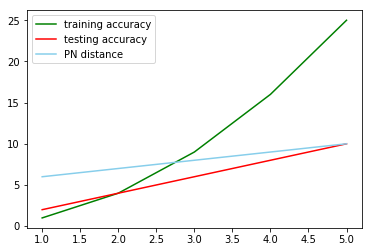

In [13]:
x=[1,2,3,4,5]
y1=[1,4,9,16,25]
y2=[2,4,6,8,10]
y3=[6,7,8,9,10]
plt.plot(x, y1, color='green', label='training accuracy')
plt.plot(x, y2, color='red', label='testing accuracy')
plt.plot(x, y3,  color='skyblue', label='PN distance')
plt.legend()

In [15]:
# rw graph
g_rwrw=[]
for i in [100,200,400,600,1000,1200,1500,2000,2200]:
    nodes,edges=rw(adj_facebook,i)
    G=nx.Graph()
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    g_rwrw.append(G)

In [ ]:
#rw D-ststistic
node,edge=rw(adj_facebook,100)
node_rw,edge_rw=data_map(node,edge)
adj_rw=graph_adj(edge_rw,len(node_rw))
deg_rw=graph_deg(adj_rw)
dist_rw=deg_dist(deg_rw)
x_list=[]
for key in dist_rw.keys():
    x_list.append(key)

ks_rw=KS_statistic(dist_facebook,dist_rw,x_list)
print(ks_rw)

In [ ]:
#rwrw D-ststistic
node,edge=rwrw(adj_facebook,100)
node_rwrw,edge_rwrw=data_map(node,edge)
adj_rwrw=graph_adj(edge_rwrw,len(node_rwrw))
#graph_plot(edge)
deg_rwrw=graph_deg(adj_rwrw)
dist_rwrw=rwrw_dist(deg_rwrw)

x_list=[]
for key in dist_rwrw.keys():
	x_list.append(key)
ks_rwrw=KS_statistic(dist_facebook,dist_rwrw,x_list)

print(ks_rwrw)

In [25]:
#rwrw graph
g_rw=[]
for i in [100,200,400,600,1000,1200,1500,2000,2200]:
    nodes,edges=rw(adj_facebook,i)
    G=nx.Graph()
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    g_rw.append(G)

In [156]:
#forestfire graph
g_ff=[]
for i in range(20):
    center=random_node(adj_facebook)
    edges=forestfire(adj_facebook,center,max_depth=200000,current_depth=0,taboo_list=[],edge_list=[])
    G=nx.Graph()
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    g_ff.append(G)

In [ ]:
# forestfire D-statistic
edge=forestfire(adj_facebook,random_node(adj_facebook),max_depth=500,current_depth=0)
node=[]
for i in range(len(edge)):
	node.append(edge[i][0])
	node.append(edge[i][1])
node_ff,edge_ff=data_map(node,edge)
adj_ff=graph_adj(edge_ff,len(node_ff))
deg_ff=graph_deg(adj_ff)
dist_ff=deg_dist(deg_ff)

x_list=[]
for key in dist_ff.keys():
    x_list.append(key)

ks_ff=KS_statistic(dist_facebook,dist_ff,x_list)
print(ks_ff)

In [3]:
g=[]
G1=nx.Graph()
G1.add_edge(1,2)
G1.add_edge(1,3)
G1.add_edge(2,3)
G2=nx.Graph()
G2.add_edge(1,2)
G2.add_edge(1,3)
G2.add_edge(2,3)
g.append(G1)
g.append(G2)

In [27]:
# mhrw graph
g_mhrw=[]
for i in [100,200,400,600,1000,1200,1500,2000,2200]:
    nodes,edges=mhrw(adj_facebook,deg_facebook,i)
    G=nx.Graph()
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    g_mhrw.append(G)

In [ ]:
# mhrw D-statistic

node,edge=mhrw(adj_facebook,deg_facebook,100)
node_mhrw,edge_mhrw=data_map(node,edge)
adj_mhrw=graph_adj(edge_mhrw,len(node_mhrw))
deg_mhrw=graph_deg(adj_mhrw)
dist_mhrw=deg_dist(deg_mhrw)

x_list=[]
for key in dist_mhrw.keys():
    x_list.append(key)

ks_mhrw=KS_statistic(dist_facebook,dist_mhrw,x_list)
print(ks_mhrw)

In [208]:
# sbs graph
g_sbs=[]
for i in range(100):
    center=random_node(adj_facebook)
    edges=snowBall(adj_facebook,random_node(adj_facebook),max_depth=500,current_depth=0,k=20,taboo_list=[],edge_list=[])
    G=nx.Graph()
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    g_sbs.append(G)

In [ ]:
# sbs D-statistic

edge=snowBall(adj_facebook,random_node(adj_facebook),max_depth=500,current_depth=0,k=20)
node=[]
for i in range(len(edge)):
	node.append(edge[i][0])
	node.append(edge[i][1])
node_sbs,edge_sbs=data_map(node,edge)
adj_sbs=graph_adj(edge_sbs,len(node_sbs))
deg_sbs=graph_deg(adj_sbs)
dist_sbs=deg_dist(deg_sbs)

x_list=[]
for key in dist_sbs.keys():
    x_list.append(key)

ks_sbs=KS_statistic(dist_facebook,dist_sbs,x_list)
print(ks_sbs)

In [297]:
node_rwrw=[]
edge_rwrw=[]
dia_rwrw=[]
clu_rwrw=[]
cc_rwrw=[]
for i in range(len(g_rwrw)):
    node_rwrw.append(g_rwrw[i].number_of_nodes())
    edge_rwrw.append(g_rwrw[i].number_of_edges())
    dia_rwrw.append(nx.diameter(g_rwrw[i]))
    clu_rwrw.append(nx.average_clustering(g_rwrw[i]))
    cc_rwrw.append(nx.number_connected_components(g_rwrw[i]))

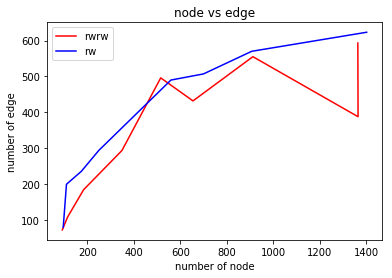

In [278]:
plt.plot([92, 115, 184, 349,516, 655 ,913, 1366, 1365],[73, 109, 185, 294,  496, 432,555, 388, 593],label="rwrw",color="red")
plt.plot([96, 110, 174, 249,560, 700 ,908, 1403],[80, 200, 236, 294,  490, 507,570,623],label="rw",color="blue")
plt.title("node vs edge")
plt.xlabel("number of node")
plt.ylabel("number of edge")
plt.legend()

In [280]:
node_sbs=[]
edge_sbs=[]
dia_sbs=[]
clu_sbs=[]
cc_sbs=[]
for i in range(len(g_sbs)):
    node_sbs.append(g_sbs[i].number_of_nodes())
    edge_sbs.append(g_sbs[i].number_of_edges())
    dia_sbs.append(nx.diameter(g_sbs[i]))
    clu_sbs.append(nx.average_clustering(g_sbs[i]))
    cc_sbs.append(nx.number_connected_components(g_sbs[i]))

In [289]:
node_ff=[]
edge_ff=[]
dia_ff=[]
clu_ff=[]
cc_ff=[]
for i in range(len(g_ff)):
    node_ff.append(g_ff[i].number_of_nodes())
    edge_ff.append(g_ff[i].number_of_edges())
    dia_ff.append(nx.diameter(g_ff[i]))
    clu_ff.append(nx.average_clustering(g_ff[i]))
    cc_ff.append(nx.number_connected_components(g_ff[i]))

In [281]:
node_rw=[]
edge_rw=[]
dia_rw=[]
clu_rw=[]
cc_rw=[]
for i in range(len(g_rw)):
    node_rw.append(g_rw[i].number_of_nodes())
    edge_rw.append(g_rw[i].number_of_edges())
    dia_rw.append(nx.diameter(g_rw[i]))
    clu_rw.append(nx.average_clustering(g_rw[i]))
    cc_rw.append(nx.number_connected_components(g_rw[i]))

In [283]:
node_mhrw=[]
edge_mhrw=[]
dia_mhrw=[]
clu_mhrw=[]
cc_mhrw=[]
for i in range(len(g_mhrw)):
    node_mhrw.append(g_mhrw[i].number_of_nodes())
    edge_mhrw.append(g_mhrw[i].number_of_edges())
    dia_mhrw.append(nx.diameter(g_mhrw[i]))
    clu_mhrw.append(nx.average_clustering(g_mhrw[i]))
    cc_mhrw.append(nx.number_connected_components(g_mhrw[i]))

In [292]:
print(node_rw)
print(edge_rw)
print(dia_rw)
print(clu_rw)
print(cc_rw)

[51, 122, 185, 260, 400, 362, 405, 678, 517]
[50, 172, 322, 445, 402, 866, 1057, 1120, 1424]
[2, 11, 10, 8, 3, 9, 8, 9, 8]
[0.0, 0.07999159310634718, 0.12174887771105784, 0.0709720613898333, 0.0058333966220692045, 0.09412760868416578, 0.12093943120670757, 0.056996265688505514, 0.1675593927318945]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


In [300]:
print(sorted(clu_rw))

[0.0, 0.0058333966220692045, 0.056996265688505514, 0.0709720613898333, 0.07999159310634718, 0.09412760868416578, 0.12093943120670757, 0.12174887771105784, 0.1675593927318945]


In [ ]:
nodes_rw=[51, 122, 185, 260, 400, 362, 405, 678, 517]
edges_rw=[50, 172, 322, 445, 402, 866, 1057, 1120, 1424]
dias_rw=[2, 11, 10, 8, 3, 9, 8, 9, 8]
clus_rw=[0.0, 0.07999159310634718, 0.12174887771105784, 0.0709720613898333, 0.0058333966220692045, 0.09412760868416578, 0.12093943120670757, 0.056996265688505514, 0.1675593927318945]

In [298]:
print(node_rwrw)
print(edge_rwrw)
print(dia_rwrw)
print(clu_rwrw)
print(cc_rwrw)

[73, 109, 185, 294, 432, 496, 555, 388, 593]
[92, 115, 184, 349, 655, 516, 913, 1366, 1365]
[13, 11, 2, 10, 10, 10, 8, 7, 7]
[0.08474156786002073, 0.022062035823503714, 0.0, 0.026530359281885185, 0.06711957203605569, 0.019892560552725595, 0.07675485464091224, 0.2164926466758808, 0.10662504429880218]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
nodes_rwrw=[73, 109, 185, 294, 432, 496, 555, 388, 593]
edges_rwrw=[92, 115, 184, 349, 655, 516, 913, 1366, 1365]
dias_rwrw=[]

In [294]:
print(node_mhrw)
print(edge_mhrw)
print(dia_mhrw)
print(clu_mhrw)
print(cc_mhrw)

[33, 112, 118, 291, 289, 361, 304, 295, 350]
[56, 139, 174, 413, 637, 617, 823, 991, 1122]
[6, 13, 13, 13, 9, 14, 10, 10, 10]
[0.2008658008658009, 0.06426445578231293, 0.18691200513234416, 0.06666720019036124, 0.11216077384406303, 0.11691895362255478, 0.20634749675735714, 0.2620070136728058, 0.2518990507122289]
[1, 1, 1, 1, 1, 1, 1, 1, 1]


In [295]:
print(node_ff)
print(edge_ff)
print(dia_ff)
print(clu_ff)
print(cc_ff)

[5, 354, 5, 21, 16, 329, 3, 4, 22, 7, 334, 320, 315, 8, 5, 10, 328, 12, 12, 327]
[4, 1696, 4, 20, 15, 1645, 2, 3, 21, 6, 1722, 1617, 1540, 7, 4, 9, 1710, 11, 11, 1716]
[2, 9, 3, 4, 4, 7, 2, 3, 7, 3, 8, 7, 6, 5, 3, 3, 5, 3, 2, 6]
[0.0, 0.39583081410666193, 0.0, 0.0, 0.0, 0.38944230116708106, 0.0, 0.0, 0.0, 0.0, 0.4082687473699675, 0.3727360031278235, 0.32504175119544654, 0.0, 0.0, 0.0, 0.38438227905192596, 0.0, 0.0, 0.3972149554635143]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
node[22,354]
dia[4,9]

In [296]:
print(node_sbs)
print(edge_sbs)
print(dia_sbs)
print(clu_sbs)
print(cc_sbs)

[23, 395, 390, 23, 390, 388, 380, 400, 394, 23, 396, 23, 22, 28, 388, 393, 388, 24, 389, 390, 22, 28, 394, 27, 386, 24, 387, 399, 22, 391, 390, 398, 390, 23, 394, 23, 24, 398, 389, 25, 394, 22, 22, 394, 22, 395, 392, 25, 395, 24, 24, 393, 22, 23, 389, 23, 407, 22, 391, 26, 22, 392, 393, 23, 393, 24, 396, 393, 22, 22, 24, 393, 392, 390, 23, 22, 24, 394, 391, 391, 389, 22, 379, 23, 22, 395, 22, 26, 24, 22, 394, 23, 29, 393, 384, 388, 391, 389, 389, 387]
[22, 2598, 2594, 22, 2615, 2610, 2536, 2617, 2627, 22, 2602, 22, 21, 27, 2581, 2611, 2602, 23, 2542, 2595, 21, 27, 2597, 26, 2608, 23, 2575, 2635, 21, 2609, 2602, 2617, 2585, 22, 2618, 22, 23, 2612, 2617, 24, 2605, 21, 21, 2605, 21, 2617, 2595, 24, 2598, 23, 23, 2611, 21, 22, 2602, 22, 2629, 21, 2616, 25, 21, 2592, 2602, 22, 2603, 23, 2600, 2614, 21, 21, 23, 2596, 2606, 2616, 22, 21, 23, 2623, 2605, 2600, 2592, 21, 2551, 22, 21, 2611, 21, 25, 23, 21, 2614, 22, 28, 2617, 2592, 2602, 2598, 2597, 2602, 2606]
[3, 6, 6, 3, 5, 5, 5, 8, 7, 3, 5,

In [ ]:
node:[23,391]
edge:[3,10]